
# Beginner Task – Exploratory Data Analysis
### Dataset: Supermarket Sales
### Domain: Data Science – Careernest Internship




## Objective:
Explore the dataset, summarize structure, visualize patterns, and highlight key business insights.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
df = pd.read_csv("/content/Supermarket_sales dataset.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


### Dataset Shape
The `df.shape` function shows the dimensions of the dataset in the format:
- Number of rows (records)
- Number of columns (features)

This helps us understand how big the dataset is.

In [ ]:
df.shape


(1000, 17)

### Dataset Information
The `df.info()` method gives a quick summary of the dataset:
- Column names
- Data types of columns
- Total non-null values in each column

This helps detect text columns, numeric columns, and missing values.

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Missing Values Check
The `df.isnull().sum()` command shows how many missing values are present in each column.

We check this to decide:
- Which columns need cleaning
- Whether rows/columns must be dropped or filled


In [ ]:
df.isnull().sum()


,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


### Duplicate Records Check
The `df.duplicated().sum()` method tells us how many rows in the dataset are exact duplicates.

Duplicate entries can affect model accuracy, so we must detect and handle them.


In [ ]:
df.duplicated().sum()

np.int64(0)

### Basic Statistical Summary
The `df.describe().T` command gives important numerical insights such as:

• Mean, min, max values  
• Standard deviation (how spread out numbers are)
• Quartiles (25%, 50%, 75%)

This helps us understand the distribution of numeric columns like:
- Unit price
- Quantity
- Tax 5%
- Total
- Rating




In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Sales,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


### Categorical Column Insights
Many of our columns are categories (like City, Gender, Payment type).  
To explore them, we check how frequently each category appears.

This helps us answer questions like:
• Which city has the most customers?
• Do more males or females shop here?
• What product lines are most popular?
• Which payment method is common?

Below, I will run value counts for:
- City
- Customer Type
- Gender
- Product Line
- Payment

After each output, I will write my own observations to explain patterns in the customer behavior.


In [ ]:
for col in ['City','Customer type','Gender','Product line','Payment']:
    print(col)
    print(df[col].value_counts())
    print("-"*40)


City
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
----------------------------------------
Customer type
Customer type
Member    565
Normal    435
Name: count, dtype: int64
----------------------------------------
Gender
Gender
Female    571
Male      429
Name: count, dtype: int64
----------------------------------------
Product line
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
----------------------------------------
Payment
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
----------------------------------------


### ✅ Observations from Categorical Data

• The highest number of transactions took place in **Yangon**, followed closely by Mandalay and Naypyitaw, showing a fairly balanced market presence across the three cities.

• **Member** customers (loyal customers) are more frequent shoppers compared to Normal customers, suggesting the store benefits strongly from repeat buyers.

• There are **more female shoppers (571)** than male shoppers (429), indicating stronger purchasing activity among women.

• **Fashion accessories** are the most purchased product line, while **Health and beauty** is the least purchased among the six categories.

• The usage of **E-wallet** is slightly higher than Cash and Credit Card, highlighting a preference toward digital payments among customers.


### Visualizing the Dataset
Visuals help us clearly understand customer behavior and sales patterns.
Below are different plots to explore:
• Distribution of Ratings
• Top-selling product lines
• Preferred payment methods
• Pairwise relationships between key variables


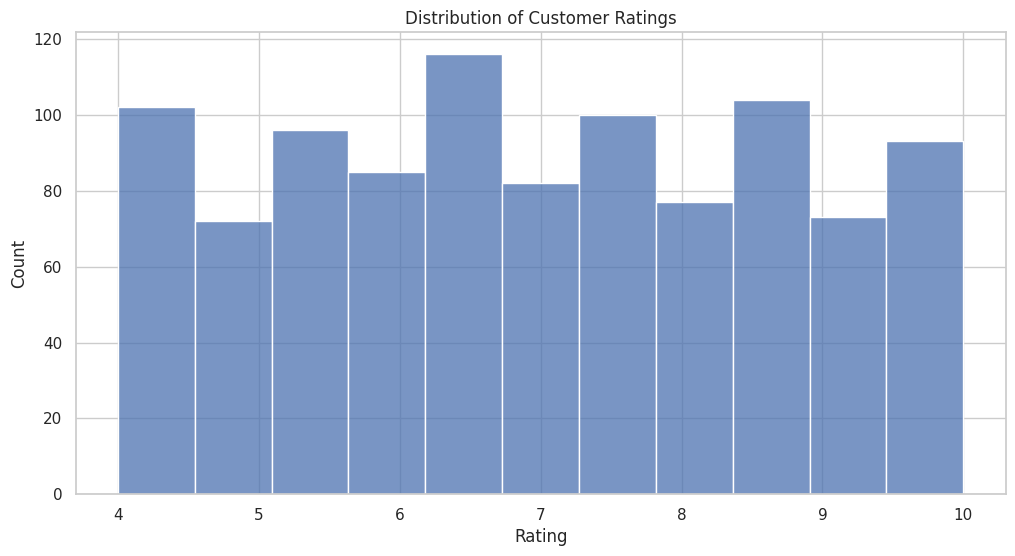

In [ ]:
sns.histplot(df['Rating'])
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


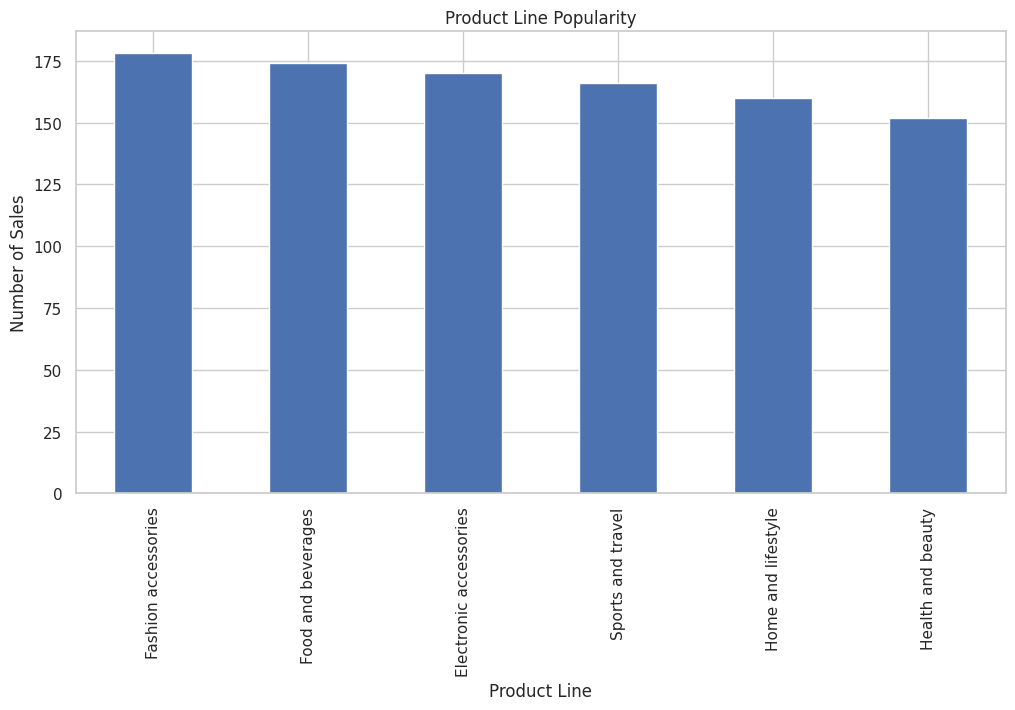

In [ ]:
df['Product line'].value_counts().plot(kind='bar')
plt.title('Product Line Popularity')
plt.xlabel('Product Line')
plt.ylabel('Number of Sales')
plt.show()


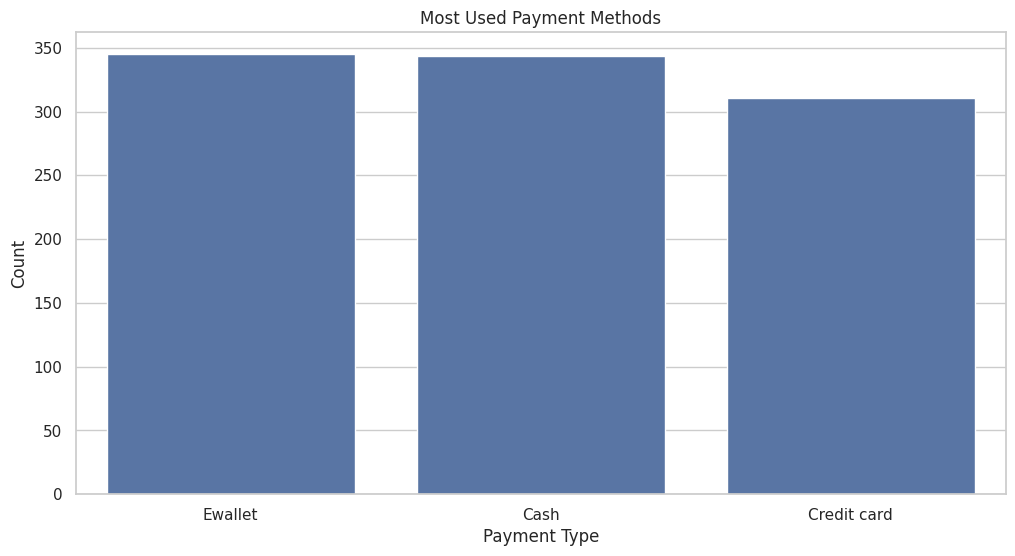

In [ ]:
sns.countplot(data=df, x='Payment')
plt.title('Most Used Payment Methods')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()


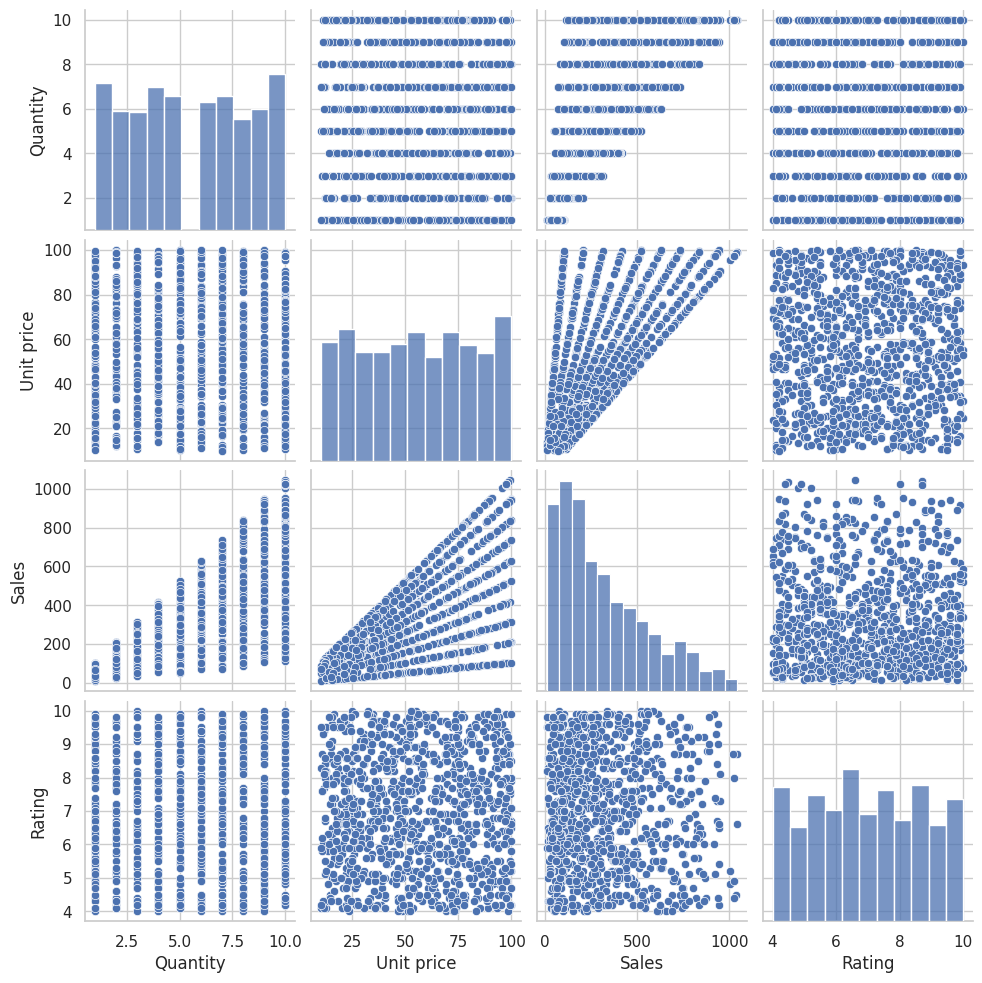

In [ ]:
sns.pairplot(df[['Quantity','Unit price','Sales','Rating']])
plt.show()

## ✅ Final Insights and Conclusion

• Yangon has slightly more sales than the other cities.  
• Female customers shop more frequently than males.  
• Fashion Accessories is the most popular product line.  
• E-Wallet is the most preferred payment option.  
• Customers mostly give positive ratings, meaning good service experience.

🟢 Conclusion:
Supermarket sales are balanced across cities, with strong digital payment adoption and higher engagement from women. Fashion Accessories and Food items are top contributors to overall revenue.

These insights can help the store plan better inventory and promotional strategies.
